<a href="https://colab.research.google.com/github/uuuuju/Handwritten_Digits_Classifier/blob/main/Digits_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the required libraries

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Loading the dataset

In [ ]:
digits = datasets.load_digits()

Visualizing images from the dataset:

In [ ]:
print(digits.data.shape)


(1797, 64)


In [ ]:
plt.gray()

<Figure size 432x288 with 0 Axes>

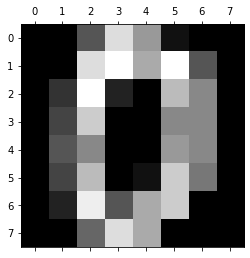

In [ ]:
plt.matshow(digits.images[0])
plt.show()

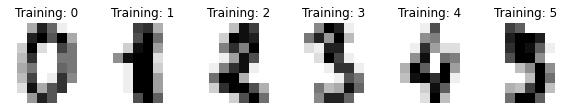

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

Flattening the images

In [ ]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

Support Vector Classifier:

In [ ]:
clf = svm.SVC(gamma=0.001)

Splitting into train and test data in 1:1 ratio

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

Fitting the data:

In [ ]:
clf.fit(X_train, y_train)


SVC(gamma=0.001)

In [ ]:
predicted = clf.predict(X_test)


Prediction for the first 6 test samples:

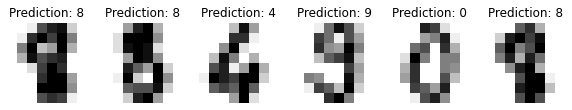

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

confusion matrix of the true digit values and the predicted digit values:
(entry i,j in a confusion matrix is the number of observations actually in group i, but predicted to be in group j.

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


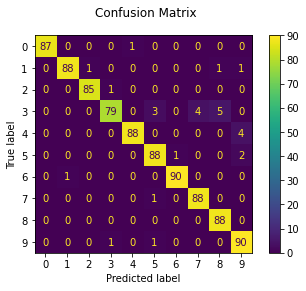

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()
